# **EXPLORATORY DATA ANALYSIS (EDA)**

## ***NHẬN KÝ***
+ Ngày 19/10: Định nghĩa vấn đề, chuẩn bị dữ liệu, thống kê mô tả
+ Ngày 26/10: Trực quan hóa dữ liệu, trực quan đơn biến, đa biến, làm sạch dữ liệu

## **Định nghĩa vấn đề**

## **Chuẩn bị vấn đề**

### **Khai báo thư viện**

In [1]:
# Load libraries
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
from io import StringIO

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### **Tải tập dữ liệu**

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_pre = pd.read_csv('gender_submission.csv')

> Tập dữ liệu được chia sẵn thành 3 tập dữ liệu con bao gồm 1 tập train, 1 tập test và 1 tập test dữ đoán kết quả.

## **Phân tích khám phá dữ liệu**

### **Thống kê mô tả**

#### **Hiển thị một số thông tin về dữ liệu**

In [3]:
# shape
print(f'+ Shape: {train_data.shape}')
# types
print(f'+ Data Types: \n{train_data.dtypes}')
# head, tail
print(f'+ Contents: ')
display(train_data.head(5))
display(train_data.tail(5))
# info
train_data.info()

+ Shape: (891, 12)
+ Data Types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
+ Contents: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Nhận xét:** 
+ Tập train_data có 891 quan sát và 12 đặc trưng, trong đó có 7 đặc trưng thuộc kiểu dữ liệu nummeric và 5 đặc trưng có kiểu object.
+ Ý nghĩa của các đặc trưng trong tập:
    + PassengerID: Mã hành khách
    + Survived: Sự sống sót; 0 = Không, 1 = Có
    + Pclass: Là một đại lượng đại diện cho tình trạng kinh tế xã hội (SES), đồng thời cũng hiển thị hạng vé của hành khách; 1= hạng nhất, 2= hạng hai, 3= hạng 3.
    + Name - Sex - Age: tên - giới tính - tuổi của các hành khách
    + SibSp: Hiển thị số lượng vợ/chồng hoặc anh/chị/em ở trên tàu; 0= không có, 1= có
    + Parch: Số phụ huynh hoặc trẻ em ở trên tàu.
    + Ticket: Mã số vé
    + Fare: Giá vé
    + Cabin: Mã số buồng
    + Embarked: Địa điểm đã lên tàu; C= Cherboug, S= Southamptom, Q= Queenstown.
+ Quan sát hiển thị 5 dòng đầu và 5 dòng cuối của tập train_data ta có thể nhận ra một số điểm đặc biệt sau:
    + Hạng vé có thể có sự liên quan đến sự sống sót của hành khách khi có thể thấy rằng khả năng hành khách hạng 1 sống sót nhiều hơn hành khách hạng 2 và hạng 3.
    + Giới tính có thể có sự liên quan đến sự sống sót khi mà số phụ nữ sống sót nhiều hơn so với nam.
    + Giá vé cũng có thể ảnh hưởng đến sự sống sót của hành khách.
    + Xuất hiện giá trị NaN ở đặc trưng Age và nhiều ở đặc trưng Cabin, có thể những dữ liệu này chưa thể thu thập, biến Age và Cabin cũng có khả năng ảnh hưởng đế sự sống sót của hành khách.
+ Dữ liệu thiếu chủ yếu ở đặc trưng Age, Cabin và Embarked. Tại đặc trưng Cabin dữ liệu bị thiếu nghiêm trọng.


In [4]:
# shape
print(f'+ Shape: {test_data.shape}')
# types
print(f'+ Data Types: \n{test_data.dtypes}')
# head, tail
print(f'+ Contents: ')
display(test_data.head(5))
display(test_data.tail(5))
# info
test_data.info()

+ Shape: (418, 11)
+ Data Types: 
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
+ Contents: 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


**Nhận xét:** 
+ Các đặc trưng trong tập test_data tương tự như tập train_data nhưng thiếu đặc trưng Survived, đặc trưng này đã được tách riêng ở tập test_pre.
+ Số lượng quan sát trong tập test_data là 418 quan sát, đặc trưng Cabin bị thiếu dữ liệu nghiêm trọng.

In [5]:
# shape
print(f'+ Shape: {test_pre.shape}')
# types
print(f'+ Data Types: \n{test_pre.dtypes}')
# head, tail
print(f'+ Contents: ')
display(test_pre.head(5))
display(test_pre.tail(5))
# info
test_pre.info()

+ Shape: (418, 2)
+ Data Types: 
PassengerId    int64
Survived       int64
dtype: object
+ Contents: 


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


**Nhận xét:**
+ Tập dữ liệu test_pre được tách riêng từ tập test_data, tập này chỉ chứa 2 đặc trưng là PassengerID và Survived cùng với đó là dữ liệu tương ứng với tập test_data. 

#### **Kiểm tra tính toàn vẹn của dữ liệu**

In [6]:

# Kiểm tra giá trị null/nan
data_null = train_data[train_data.isnull().any(axis=1)]
if not data_null.empty:
    print('Số lượng dòng chứa giá trị null/nan: ', data_null.shape[0])
    display(data_null)
    print("Số lượng giá trị null/nan theo từng cột:")
    print(train_data.isnull().sum())
else:
    print('Không có giá trị null/nan nào.')

Số lượng dòng chứa giá trị null/nan:  708


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Số lượng giá trị null/nan theo từng cột:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


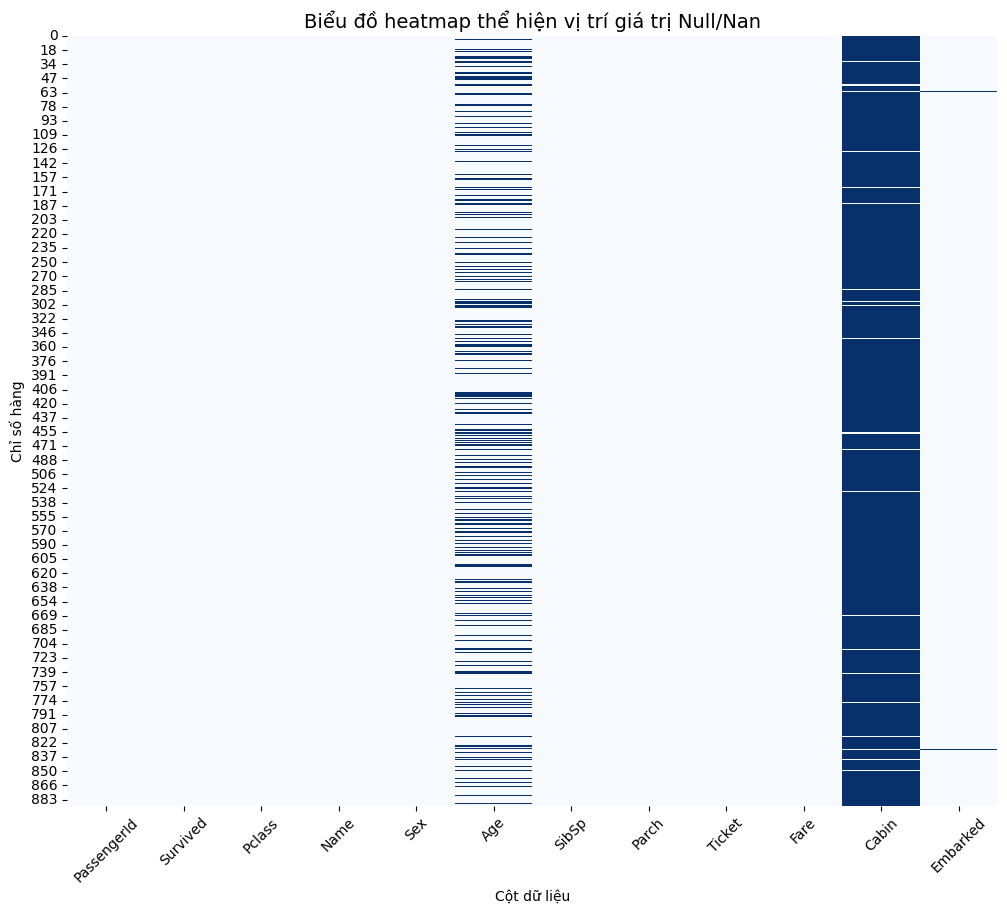

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data_null.isnull(), cmap = 'Blues', cbar = False)

plt.title('Biểu đồ heatmap thể hiện vị trí giá trị Null/Nan', fontsize = 14)
plt.xlabel('Cột dữ liệu')
plt.ylabel('Chỉ số hàng')
plt.xticks(rotation=45)
plt.show()
plt.close()

**Nhận xét:**
+ Dữ liệu bị thiếu ở đặc trưng Cabin quá nghiêm trọng vì thế ta không thể sử dụng đặc trưng này cho việc huấn luyện mô hình.
+ Dữ liệu bị thiếu ở đặc trưng Age và Embarked không quá nhiều so với tập dữ liệu, vì thế sẽ quan sát và sử dụng các phương pháp để xử lý.

In [8]:
data_dup = train_data[train_data.duplicated(keep=False)]
if not data_dup.empty:
    print('Số hàng trùng nhau: ', train_data.duplicated(keep="first").sum())

    # Nhóm theo toàn bộ các cột
    grouped = data_dup.groupby(list(train_data.columns))

    # Duyệt và hiển thị từng nhóm
    for i, (key, group) in enumerate(grouped, start=1):
        print(f'\n nhóm trùng lặp: {i} (số dòng: {len(group)})')
        display.display(group)

    print('Tổng hợp các dòng trùng lặp')
    display.display(data_dup)
else:
    print('Không có hàng nào trùng nhau.')

Không có hàng nào trùng nhau.


**Nhận xét:** Tập dữ liệu không xuất hiện quan sát nào bị trùng.

#### **Các tính chất thống kê trên dữ liệu số**

In [9]:
description = train_data.describe().T
display(description)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Nhận xét:**
+ Cột count hiển thị số lượng quan sát đếm được của từng đặc trưng, dễ dàng thấy rằng đặc trưng Age bị thiếu dữ liệu rõ rệt.
+ Tỉ lệ mean của Survived là 0.3838 cho thấy số lượng hành khách không qua khỏi chiếm đa số.
+ Số lượng hành khách có vé hạng 2 và 3 là chiếm nhiều hơn.
+ Trung bình và đa số độ tuổi của các hành khách là khoảng gần 30 tuổi, độ tuổi thấp nhất là 0.42 tức là trẻ sơ sinh và độ tuổi lớn nhaasts là 80 tuổi.
+ Giá vé trung bình là 32.2 và có độ lệch chuẩn khoảng 49.69 cho thấy sự chênh lệch giá vé giữa các hành khách là khác nhau. 25% hành khách có giá vé ở trong khoảng 7.9, 50% ở trong khoảng 14.45 và 75% ở trong khoảng 31. Giá vé nhỏ nhất là 0, đây có thể là miễn phí cho trẻ em, giá vé lơn nhất là khoảng 512 có thể có sự nhầm lẫn trong khi nhập liệu, thu thập dữ liệu hoặc đây là một trường hợp đặc biệt.

#### **Các tính chất thống kê trên dữ liệu phân loại**

In [10]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


**Nhận xét:**
+ Có 5 đặc trưng có kiểu dữ liệu phân loại bao gồm Name, Sex, Ticket, Cabin và Embarked.
+ Số lượng giá trị thiếu ở đặc trưng Cabin và Embarked là rõ rệt, có thể là do gặp khó khăn trong việc thu thập dữ liệu hoặc thiếu sót trong khi nhập liệu.
+ Số lượng giá trị khác nhau ở đặc trưng Name là 891 tương ứng với số lượng đếm được, cho thấy không có người nào được nhân đôi.
+ Số lượng giá trị khác nhau của đặc trưng Sex là 2, nghĩa là chỉ có giới tính nam và nữ.
+ Có 681 loại vé so với số lượng vé là 891 thì cho thấy nhiều hành khách có thể trùng loại vé với nhau. Tương tự, đặc trưng Cabin cũng thế, có khả năng nhiều hành khách có cùng Cabin với nhau.
+ Chỉ có 3 loại Embarked là chỉ có 3 điểm đón hành khách.
+ Top là giá trị xuất hiện nhiều nhất và freq là tần suất xuất hiện của giá trị top.

#### **Tần số xuất hiện của các lớp trong biến mục tiêu**

In [11]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Nhận xét:** 
+ Sự chênh lệch giữa sống sót và không qua khỏi là điều có thể hiểu được khi tập dữ liệu được thu thập từ một trong những tai nạn lớn nhất trên thế giới, hoàn cảnh và điều kiện cứu hộ khi tai nạn xảy ra lúc đó thật sự hiểm nghèo.

#### **Phân tích dữ liệu bằng cách xoay (pivot) các đặc trưng (features) để tổng hợp, nhóm, và so sánh các thông tin một cách có hệ thống**

In [12]:
#Pclass & Survived
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Nhận xét:**
+ Vé hạng 1 tỉ lệ sống sót là ≈ 0.62963 (62.96%).
+ Vé hạng 2 tỉ lệ sống sót là ≈ 0.47283 (47.28%).
+ Vé hạng 3 tỉ lệ sống sót là ≈ 0.24236 (24.24%).
+ Khoảng cách tuyệt đối giữa hạng 1 và hạng 3: 0.62963 − 0.24236 = 0.38727 → tăng khoảng 38.7 điểm phần trăm.
+ Tỉ lệ tương đối (risk ratio) hạng1 vs hạng3: 0.62963 / 0.24236 ≈ 2.60 → khả năng sống sót của hành khách hạng 1 ~2.6 lần so với hạng 3.
+ Hạng 2 ở giữa, cho thấy vẫn tốt hơn hạng 3 nhưng kém hơn hạng 1.
+ Hành khách ở hạng cao hơn có tỉ lệ sống sót cao hơn.
+ Hành khách ở hạng 1 có thể được ưu tiên cứu họ do có thể gần nơi dễ dàng cứu hộ hoặc là hành khách có đặc quyền cao nên được ưu tiên

In [13]:
#Sex & Survived
train_data[["Sex" , "Survived"]].groupby(["Sex"] , as_index = False).mean().sort_values(by="Survived" , ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Nhận xét:**
+ Phụ nữ có tỉ lệ sống sót là ≈ 0.742038 (74.20%).
+ Đàn ông có tỉ lệ sống sót là ≈ 0.188909 (18.89%).
+ Phụ nữ có tỉ lệ sống sót cao hơn đàn ông, có thể do được ưu tiên cứu hộ.

In [14]:
#Parch & Survived
train_data[["Parch" , "Survived"]].groupby(["Parch"] , as_index = False) .mean().sort_values(by="Survived" , ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Nhận xét:**
+ Hành khách có Parch = 1,2,3 (có đi cùng 1–3 cha/mẹ/con) có tỉ lệ sống sót cao hơn so với những người không có Parch (0).
+ Có thể do: những người đi cùng gia đình (phụ huynh hoặc con cái) được ưu tiên/giúp đỡ nhau khi sơ tán.
+ Tỉ lệ ở Parch = 3 cao (60%) tuy nhiên thì các giá trị Parch = 4,6 thì có tỉ lệ là 0%, có thể là do kích thước mẫu quá nhỏ nên con số không đáng tin. Parch = 5 chỉ 20% cũng có thể do sample size nhỏ hoặc đặc thù nhóm đó.

In [15]:
# Embarked & Survived
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**Nhận xét:**
+ Hành khách lên tàu ở C (Cherbourg) có tỉ lệ sống sót cao nhất (~55%), tiếp theo Q (Queenstown) ~39%, thấp nhất S (Southampton) ~33.7%.
+ Khả năng cảng có nhiều phụ nữ hơn hoặc có nhiều vé hạng 1 hơn nên tỉ lệ sống sót khác nhau.
+ Embarked có liên hệ với Survived, nhưng rất có thể là do confounding (Pclass, Sex, v.v).

In [16]:
# SibSp & Survived
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Nhận xét:**
+ SibSp = 1 (có 1 anh/chị/em hoặc vợ/chồng) có tỉ lệ sống sót cao nhất ~53.6%. SibSp = 2 ~46.4%. Tương tự Parch: có 1–2 người thân đi cùng giúp tăng cơ hội sống sót.
+ SibSp = 0 (đơn lẻ) có tỉ lệ sống sót ~34.5% — thấp hơn nhiều so với SibSp = 1.
+ Các SibSp >= 4 có tỉ lệ rất thấp hoặc 0% — rất có thể do mẫu quá nhỏ hoặc nhóm đó gặp bất lợi khi sơ tán (gia đình lớn khó di chuyển).

#### **Mối tương quan giữa các tính chất (Correlations)**

In [17]:
corr = train_data.select_dtypes(include=['number']).corr(method='pearson')
display(corr)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Nhận xét:**
+ Cặp Survived - Pclass ~ -0.338481 (-33,85%) cho thấy tương quan nghịch giữa hai đặc trưng, nghĩa là hạng vé càng cao thì tỉ lệ sống càng cao.
+ Cặp Survived - Age ~ -0.077221 (-7.72%) cho thấy tương quan nghịch yếu giữa hai đặc trưng, có ý nghĩa rằng hành khách có độ tuổi càng cao thì tỉ lệ sống sót càng thấp, đây có thể chỉ coi là một xu hướng.
+ Cặp Survived - SibSp ~ -0.035322 (-3.53%) cho thấy tương quan nghịch giữa hai đặc trưng, Có nhiều anh/chị/em/vợ/chồng đi cùng thì có khả năng sống sót thấp, có thể là do gia đình lớn không thoát kịp.
+ Cặp Survived - Parch ~ 0.081629 (8.16%) tương quan thuận nhẹ, xu hướng cha mẹ/con đi cùng thì có khả năng sống sót cao hơn
+ Cặp Survived - Fare ~ 0.257307 (25.73%) tương quan thuận giữa hai đặc trưng, nghĩa là giá vé càng cao thì tỉ lệ sống sót càng cao.

### **Trực quan hóa dữ liệu**

#### **Hiển thị trên từng tính chất đơn ((Univariate Plots))**

##### Box and whisker plots

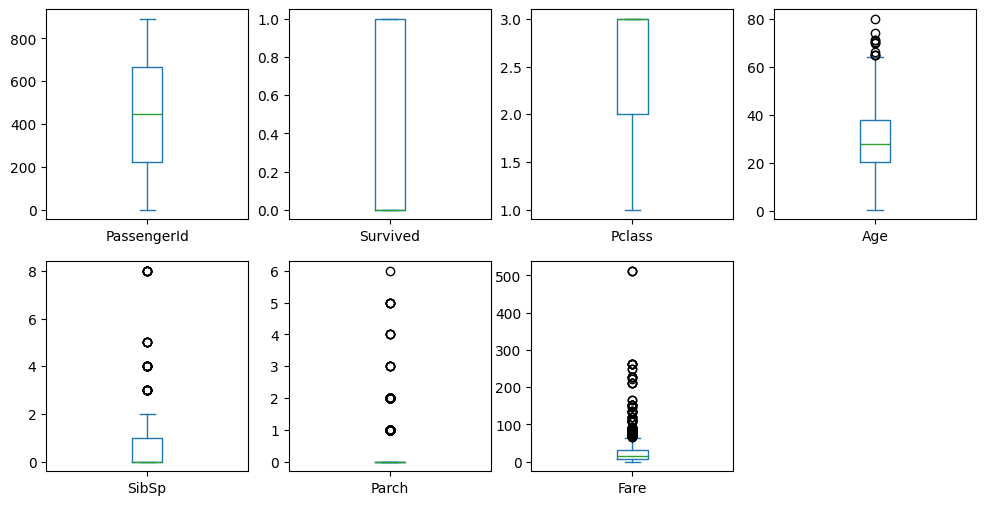

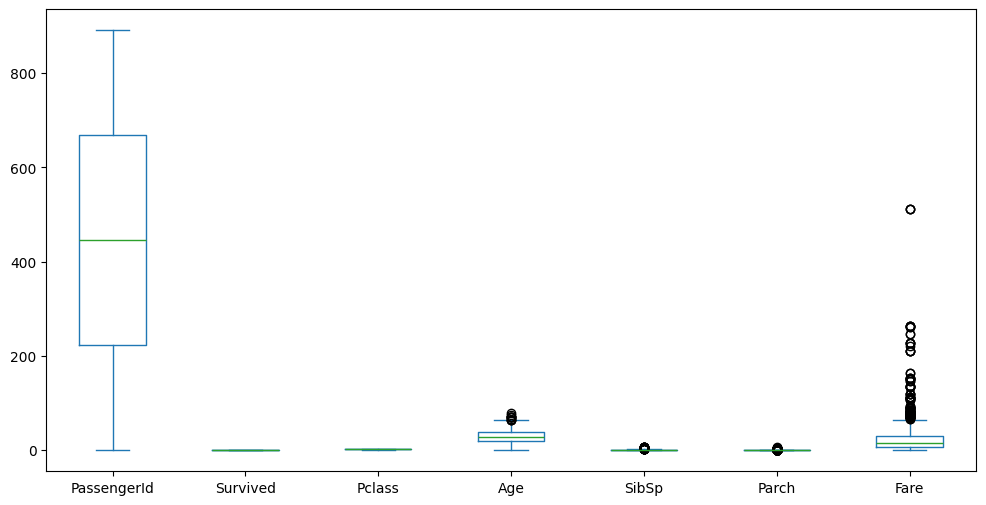

In [18]:

train_data.plot(kind="box", subplots=True, layout=(2, 4), sharex=False, sharey=False, figsize=(12,6))
train_data.plot(kind="box", figsize=(12,6))
plt.show()
plt.close()

**Nhận xét:**
Boxplot minh họa độ phân tán, trung vị và ngoại lai của 7 đặc trưng định lượng:

+ PassengerId: Phân phối đều, không có ngoại lai — chỉ mang tính thứ tự.
+ Survived: Hai mức 0–1, không có giá trị trung gian, không có ngoại lệ.
+ Pclass: Ba mức 1–3, giá trị càng cao → hạng càng thấp. Không có ngoại lai.
+ Age: Phân bố khá đều, trung vị khoảng 28 tuổi. Một số điểm ngoại lai là người cao tuổi (~70–80).
+ SibSp: Trung vị = 0, nhiều điểm ngoại lai ở các giá trị cao (5–8) → ít người đi cùng nhiều thân nhân.
+ Parch: Trung vị = 0, cũng có vài ngoại lai ở 5–6.
+ Fare: Nhiều ngoại lai phía trên 200, biểu hiện sự chênh lệch giá vé lớn giữa hành khách bình dân và thượng lưu.

=> Boxplot chỉ ra sự tồn tại của nhiều giá trị ngoại lai (outliers) ở Fare, SibSp, Parch, cần được xem xét khi chuẩn bị dữ liệu.

##### Histogram chart

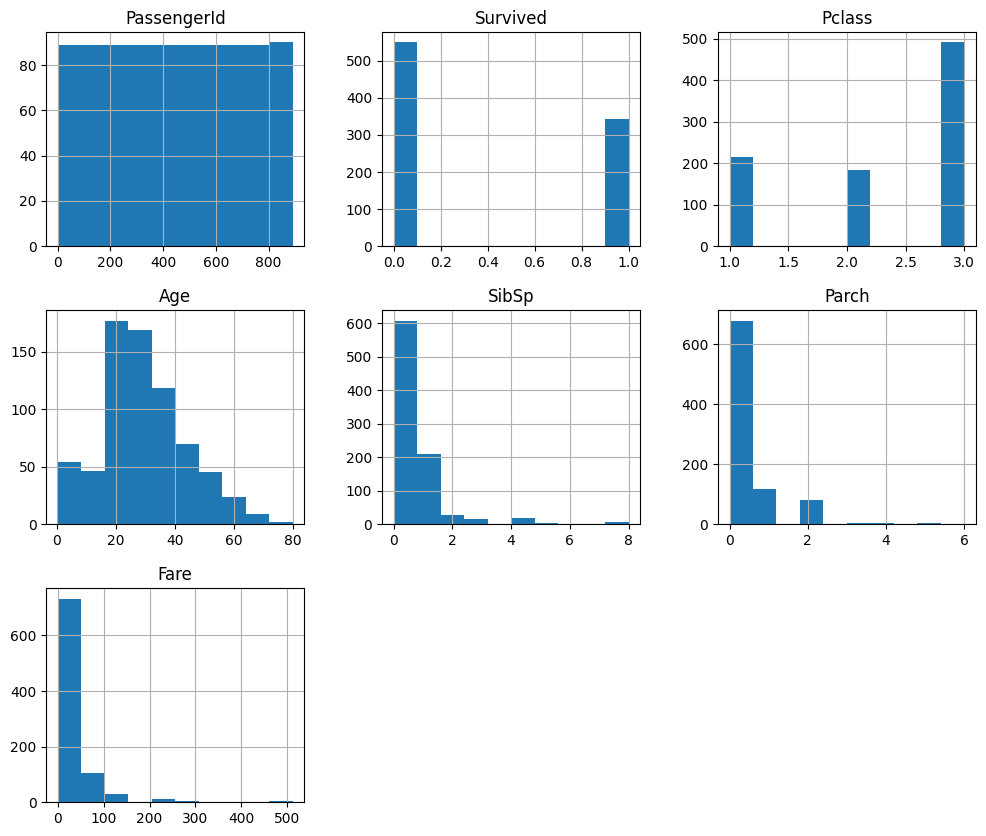

In [19]:
numeric_cols = train_data.select_dtypes(include='number')
numeric_cols.hist(figsize=(12,10))
plt.show()
plt.close()

**Nhận xét:**
Biểu đồ Histogram thể hiện phân phối của 7 đặc trưng định lượng trong bộ dữ liệu Titanic:

+ PassengerId: Phân phối đồng đều từ 1 đến 891 — đây chỉ là mã định danh nên không mang ý nghĩa thống kê thực tế.
+ Survived: Biến nhị phân (0 = không sống sót, 1 = sống sót). Biểu đồ cho thấy số người không sống sót chiếm đa số (~62%), còn người sống sót chiếm khoảng 38%.
+ Pclass: Phân phối rời rạc với 3 giá trị (1, 2, 3). Phần lớn hành khách thuộc hạng 3 (bình dân), ít người ở hạng 1 (cao cấp).
+ Age: Có dạng gần chuẩn, tập trung nhiều trong khoảng 20–35 tuổi, ít trẻ nhỏ và người già.
+ SibSp: Đa số giá trị là 0, cho thấy phần lớn hành khách đi một mình, chỉ một số ít đi cùng 1–2 người thân.
+ Parch: Cũng tương tự SibSp, đa số là 0, nghĩa là phần lớn không đi cùng cha mẹ hay con cái.
+ Fare: Phân phối lệch phải mạnh, đa số hành khách mua vé giá thấp (dưới 50), chỉ vài người trả giá cao (>200).

=> Tổng thể, histogram cho thấy bộ dữ liệu bị lệch phải ở các biến như Fare, SibSp, Parch và có sự mất cân bằng rõ rệt trong biến Survived.

##### Biểu đồ mật độ Density

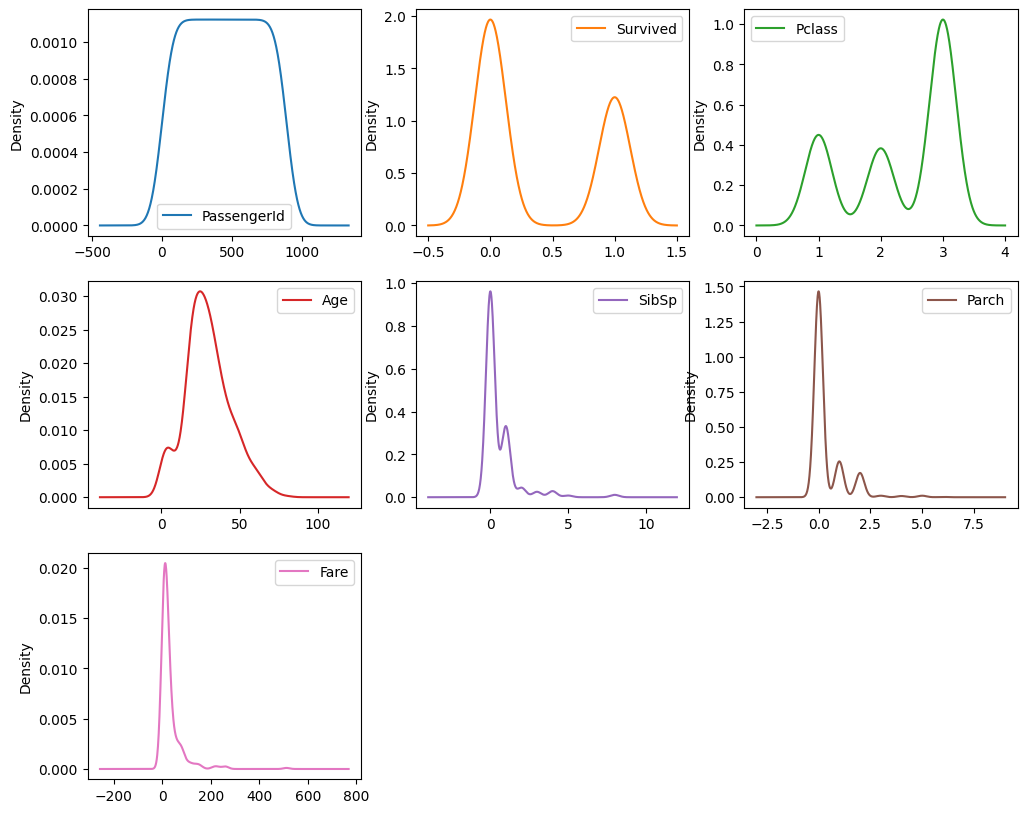

In [20]:
train_data.select_dtypes(include='number').plot(
    kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12,10)
)
plt.show()
plt.close()

**Nhận xét:**
Biểu đồ mật độ giúp nhận biết hình dạng phân phối liên tục của 7 đặc trưng:

+ PassengerId: Mật độ phân bố đều — xác nhận đây là biến thứ tự, không có ý nghĩa thống kê.
+ Survived: Hai đỉnh tách biệt ở 0 và 1; tỷ lệ vùng dưới đỉnh 0 lớn hơn nhiều → cho thấy mất cân bằng dữ liệu.
+ Pclass: Ba đỉnh riêng biệt, trong đó đỉnh Pclass = 3 cao nhất → hành khách hạng thấp chiếm số đông.
+ Age: Phân phối mượt, cao nhất khoảng 30 tuổi, giảm dần về hai phía → cho thấy hành khách chủ yếu là người trưởng thành.
+ SibSp: Mật độ tập trung cực mạnh ở 0 và giảm nhanh khi số người thân tăng lên → xác nhận phần lớn đi một mình.
+ Parch: Phân bố tương tự SibSp, phần lớn bằng 0, chỉ một vài có giá trị > 2.
+ Fare: Có đỉnh rất nhọn ở giá trị thấp (~10–30), sau đó kéo dài đuôi phải rất xa → biểu hiện lệch phải mạnh (right-skewed).

=> Biểu đồ mật độ giúp xác định các biến có phân phối không chuẩn (non-normal) như Fare, SibSp, Parch và gợi ý cần chuẩn hóa (scaling/log transform) khi huấn luyện mô hình.

#### **Hiển thị nhiều tính chất (Multivariate Plots)**

##### **Scatter Matrix (Ma trận phân tán)**



Ma trận phân tán thể hiện mối quan hệ trực quan giữa từng cặp đặc trưng:

+ Fare vs Pclass: Mối quan hệ ngược rõ rệt — vé đắt hơn tương ứng hạng cao hơn.
+ Age vs Fare: Không có xu hướng tuyến tính — giá vé không phụ thuộc độ tuổi.
+ SibSp vs Parch: Có mối quan hệ dương nhẹ, xuất hiện cụm điểm tại (0,0) → phần lớn đi một mình.
+ Survived kết hợp với các biến khác (như Fare, Pclass) cho thấy sự phân tách tương đối rõ giữa nhóm sống sót và không sống sót.
+ PassengerId không tạo xu hướng với bất kỳ biến nào — chỉ dùng để đánh chỉ số.

=> Ma trận phân tán giúp ta hình dung tính độc lập và mối tương quan phi tuyến giữa các đặc trưng, hỗ trợ chọn đặc trưng đầu vào hợp lý cho mô hình.

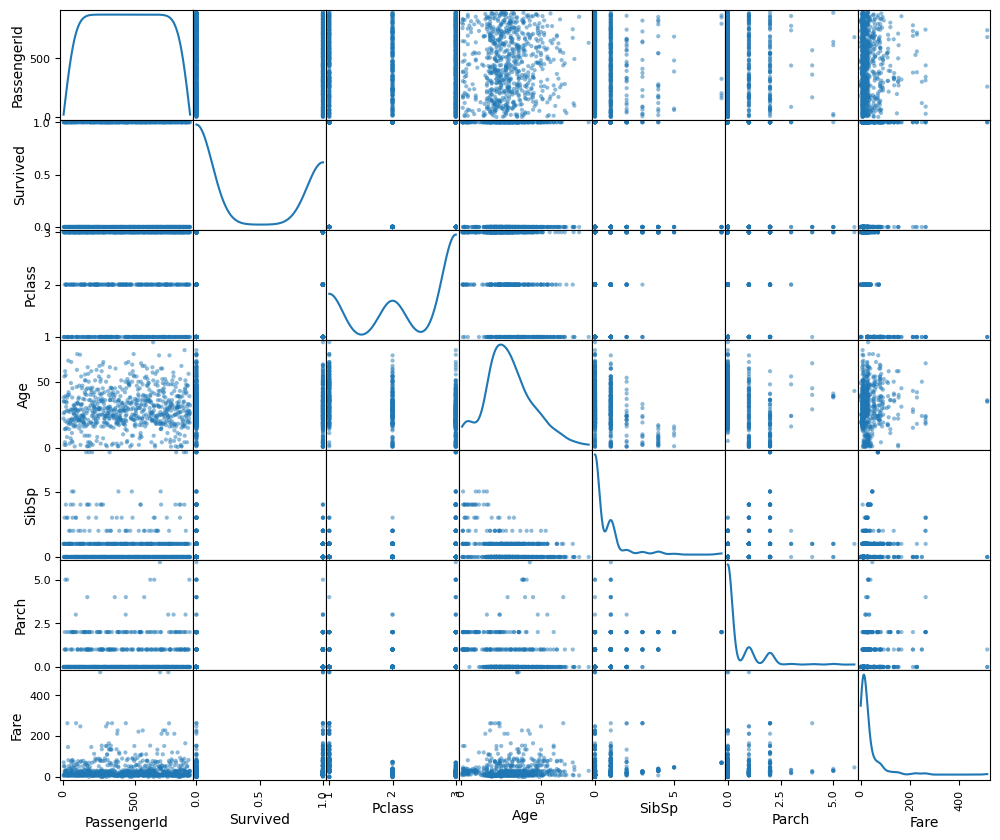

In [21]:
numeric_cols = train_data.select_dtypes(include='number')
pd.plotting.scatter_matrix(numeric_cols, figsize=(12,10), diagonal='kde')
plt.show()
plt.close()

**Nhận xét:**

Ma trận phân tán thể hiện mối quan hệ trực quan giữa từng cặp đặc trưng:
+ Fare vs Pclass: Mối quan hệ ngược rõ rệt — vé đắt hơn tương ứng hạng cao hơn.
+ Age vs Fare: Không có xu hướng tuyến tính — giá vé không phụ thuộc độ tuổi.
+ SibSp vs Parch: Có mối quan hệ dương nhẹ, xuất hiện cụm điểm tại (0,0) → phần lớn đi một mình.
+ Survived kết hợp với các biến khác (như Fare, Pclass) cho thấy sự phân tách tương đối rõ giữa nhóm sống sót và không sống sót.
+ PassengerId không tạo xu hướng với bất kỳ biến nào — chỉ dùng để đánh chỉ số.

=> Ma trận phân tán giúp ta hình dung tính độc lập và mối tương quan phi tuyến giữa các đặc trưng, hỗ trợ chọn đặc trưng đầu vào hợp lý cho mô hình.

##### **Hiển thị mối tương quan giữa các biến với nhau bằng biểu đồ heatmap**

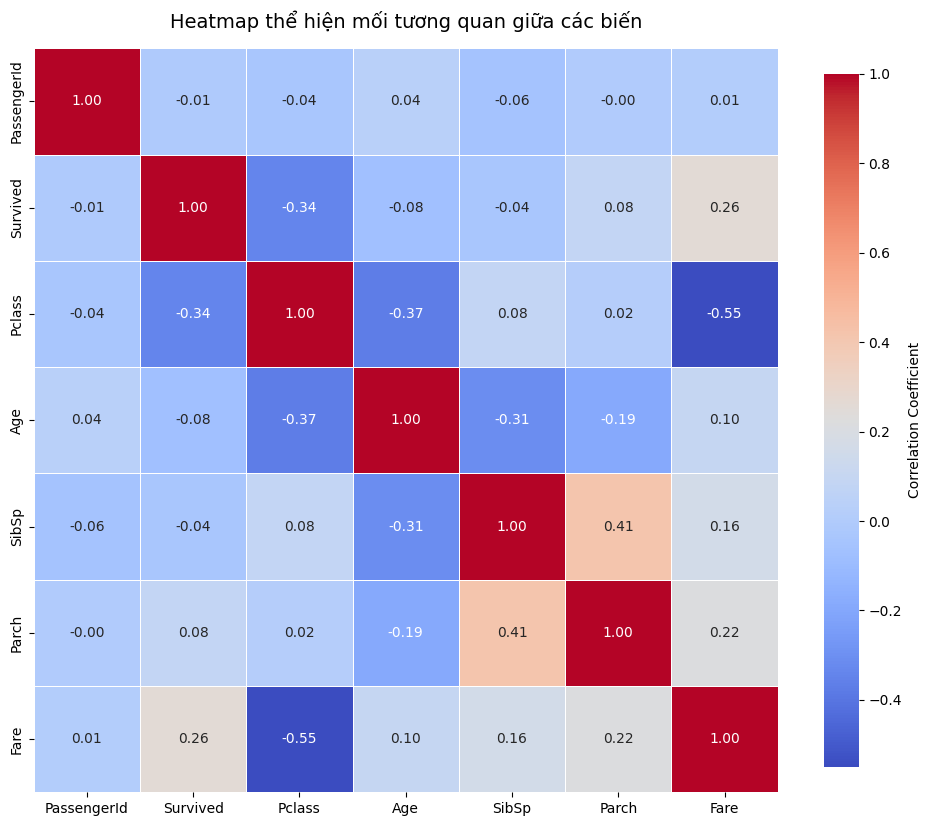

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(
    corr,
    annot=True, #hien thi gtri tren cac o
    fmt = ".2f", #lam tron 2 chu so thap phan
    cmap = "coolwarm", #bang mau 
    linewidths=0.5, #khoang cach giua cac o
    square=True, # hien thi o vuong cho dep
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"} #thanh mau ben phai
)
plt.title("Heatmap thể hiện mối tương quan giữa các biến", fontsize = 14, pad=15)
plt.show()
plt.close()

**Nhận xét:**

Bản đồ nhiệt thể hiện mức độ tương quan giữa 7 đặc trưng định lượng:

+ Survived ↔ Fare (r = 0.26): tương quan dương vừa phải — hành khách trả vé cao có khả năng sống sót cao hơn.
+ Survived ↔ Pclass (r = -0.33): tương quan âm — hành khách hạng cao (Pclass thấp) có cơ hội sống cao hơn.
+ Pclass ↔ Fare (r = -0.55): tương quan âm mạnh — vé càng rẻ thì hạng càng thấp.
+ SibSp ↔ Parch (r = 0.41): tương quan dương khá mạnh — người có anh/chị/em đi cùng thường có cả cha mẹ hoặc con đi cùng.
+ Age có tương quan yếu với các biến khác — tuổi không ảnh hưởng rõ rệt đến giá vé hoặc khả năng sống sót.
+ PassengerId gần như độc lập, không tương quan với bất kỳ biến nào.
=> Bản đồ nhiệt giúp xác định Fare, Pclass, Survived là các biến quan trọng nhất, có liên hệ chặt chẽ với nhau và ảnh hưởng mạnh đến hành vi sống sót.